<a href="https://colab.research.google.com/github/bhattrahul301/Assignment1/blob/main/total_compensation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/train_set.csv')

In [3]:
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [4]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,197386.000000,197386.00000,197386.000000,197386.000000,197386.000000,197386.000000,197386.000000,197386.000000
mean,2014.249916,2.97703,490.515918,26919.345060,63133.280435,4396.537475,8922.416270,97811.702831
std,1.015216,1.57563,333.389981,15542.215979,44573.599443,11051.769994,4899.286159,67670.296460
min,2013.000000,1.00000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.00000,236.000000,13429.250000,23205.000000,0.000000,4314.670000,35662.000000
50%,2014.000000,2.00000,535.000000,27034.500000,62468.000000,0.000000,11968.820000,97935.000000
75%,2015.000000,4.00000,790.000000,40424.750000,92884.750000,2741.000000,12801.790000,141990.500000
max,2016.000000,7.00000,990.000000,53794.000000,507831.000000,208668.000000,21872.800000,648875.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197386 entries, 0 to 197385
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                197386 non-null  int64  
 1   OGC                 197386 non-null  int64  
 2   OG                  197386 non-null  object 
 3   DC                  197386 non-null  object 
 4   Dept                197386 non-null  object 
 5   UC                  197386 non-null  int64  
 6   Union               197359 non-null  object 
 7   JF                  197358 non-null  object 
 8   Job                 197386 non-null  object 
 9   EI                  197386 non-null  int64  
 10  Salaries            197386 non-null  int64  
 11  Overtime            197386 non-null  int64  
 12  H/D                 197386 non-null  float64
 13  YT                  197386 non-null  object 
 14  Total_Compensation  197386 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [6]:
df.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [9]:
df1=df.drop(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI','H/D', 'YT'],axis=1)

In [10]:
df1.isnull().sum()

Salaries              0
Overtime              0
Total_Compensation    0
dtype: int64

<Figure size 720x360 with 0 Axes>

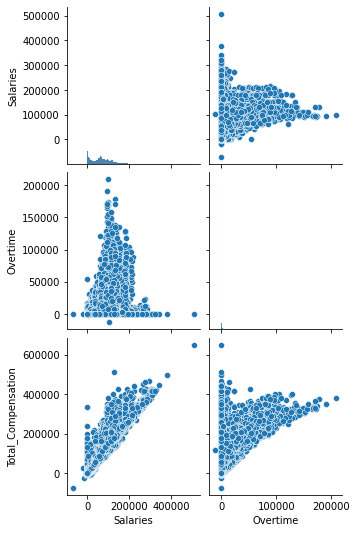

In [12]:
plt.figure(figsize=(10,5))
sns.pairplot(df1, x_vars = ['Salaries', 'Overtime'])

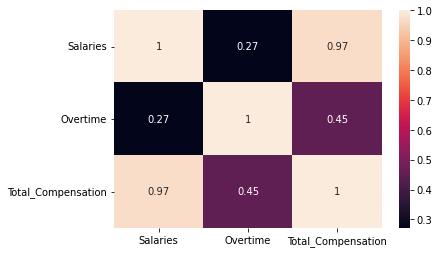

In [13]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df1.drop('Total_Compensation', axis = 1)
Y = df1['Total_Compensation']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =10)

In [15]:
lr=LinearRegression()

In [16]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.400e+06
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:30:59   Log-Likelihood:            -1.4448e+06
No. Observations:              138170   AIC:                         2.890e+06
Df Residuals:                  138167   BIC:                         2.890e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4427.4735     39.223    112.880      0.0

In [19]:
lr.params

const       4427.473515
Salaries       1.392093
Overtime       1.251844
dtype: float64

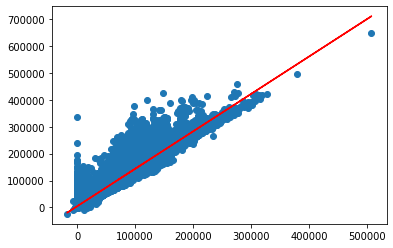

In [20]:
X_train_1=X_train.iloc[:,:1]
plt.scatter(X_train_1, Y_train)
plt.plot(X_train_1, 4418.218949 + 1.392334*X_train_1, 'r')
plt.show()

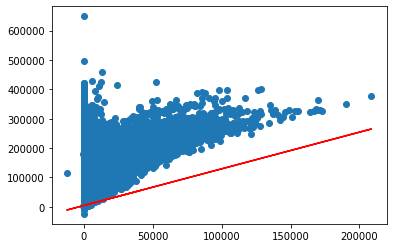

In [21]:
X_train_2=X_train.iloc[:,-1:]
plt.scatter(X_train_2, Y_train)
plt.plot(X_train_2, 4418.218949 + 1.248357*X_train_2, 'r')
plt.show()